#Predicting sentiment from product reviews



In [ ]:
import sklearn, pandas
import numpy as np

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Read some product review data

Loading reviews for a set of baby products. 

In [ ]:
products = pandas.read_csv("/content/drive/MyDrive/Practice Notebook/Analyzing Product Sentiment/amazon_baby.csv")

#Let's explore this data together

Data includes the product name, the review text and the rating of the review. 

In [ ]:
products.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


#Build the word count vector for each review

In [ ]:
#products['review'].dtype
from nltk.tokenize import word_tokenize
def word_count_function(string):
  count = {}
  for word in word_tokenize(string.strip()):
    count[word] = count.get(word, 0) + 1
  return count
products['word_count'] = products['review'].map(word_count_function, na_action="ignore")

In [ ]:
products.head()

,name,review,rating,word_count
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3,"{'These': 1, 'flannel': 1, 'wipes': 2, 'are': ..."
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,"{'it': 3, 'came': 1, 'early': 1, 'and': 3, 'wa..."
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,"{'Very': 1, 'soft': 1, 'and': 2, 'comfortable'..."
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,"{'This': 1, 'is': 4, 'a': 2, 'product': 2, 'we..."
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,"{'All': 1, 'of': 1, 'my': 1, 'kids': 2, 'have'..."


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#products['name'].show()
#products['name'].dropna().apply(pandas.value_counts) #.plot(kind='bar')
from collections import Counter
product_counter = Counter(products['name'].dropna().values)
print(product_counter.most_common(5))

[('Vulli Sophie the Giraffe Teether', 785), ('Simple Wishes Hands-Free Breastpump Bra, Pink, XS-L', 562), ('Infant Optics DXR-5 2.4 GHz Digital Video Baby Monitor with Night Vision', 561), ('Baby Einstein Take Along Tunes', 547), ('Cloud b Twilight Constellation Night Light, Turtle', 520)]


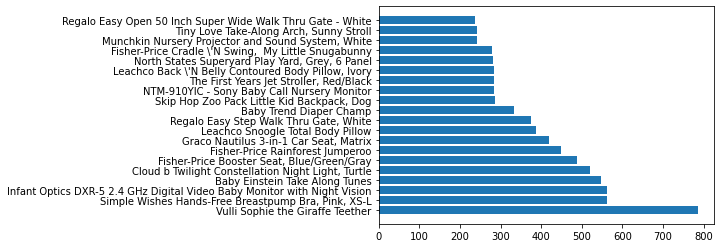

In [ ]:
# Plot the products with the most reviews
best_products_plotted = 20
products_plotted = product_counter.most_common(best_products_plotted)
counter_labels, counts = zip(*products_plotted)
counter_pos = np.arange(best_products_plotted)
plt.barh(counter_pos, counts)
plt.yticks(counter_pos, counter_labels)
plt.show()

#Examining the reviews for most-sold product:  'Vulli Sophie the Giraffe Teether'

In [ ]:
giraffe_reviews = products.loc[products['name'] == 'Vulli Sophie the Giraffe Teether']

In [ ]:
len(giraffe_reviews)

785

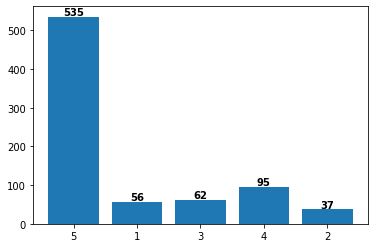

In [ ]:
#giraffe_reviews['rating'].show(view='Categorical')
rating_counter = Counter(giraffe_reviews['rating'].values)
counter_pos = np.arange(len(rating_counter))
counter_labels, counts = zip(*rating_counter.items())
plt.bar(counter_pos, counts)
plt.xticks(counter_pos, counter_labels)
for i, v in enumerate(counts):
    plt.text(x=i, y=v+4.0, s=str(v), horizontalalignment='center', color='black', fontweight="bold")
plt.show()

#Build a sentiment classifier

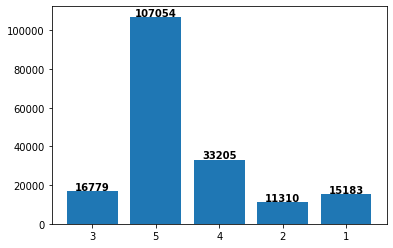

In [ ]:
#products['rating'].show(view='Categorical')
rating_counter = Counter(products['rating'].values)
counter_pos = np.arange(len(rating_counter))
counter_labels, counts = zip(*rating_counter.items())
plt.bar(counter_pos, counts)
plt.xticks(counter_pos, counter_labels)
for i, v in enumerate(counts):
    plt.text(x=i, y=v+500.0, s=str(v), horizontalalignment='center', color='black', fontweight="bold")
plt.show()

##Define what's a positive and a negative sentiment

We will ignore all reviews with rating = 3, since they tend to have a neutral sentiment.  Reviews with a rating of 4 or higher will be considered positive, while the ones with rating of 2 or lower will have a negative sentiment.   

In [ ]:
#ignore all 3* reviews
products = products.loc[products['rating'] != 3]

In [ ]:
#positive sentiment = 4* or 5* reviews
products['sentiment'] = products['rating'] >=4

In [ ]:
products.head()

,name,review,rating,word_count,sentiment
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,"{'it': 3, 'came': 1, 'early': 1, 'and': 3, 'wa...",True
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,"{'Very': 1, 'soft': 1, 'and': 2, 'comfortable'...",True
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,"{'This': 1, 'is': 4, 'a': 2, 'product': 2, 'we...",True
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,"{'All': 1, 'of': 1, 'my': 1, 'kids': 2, 'have'...",True
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,"{'When': 1, 'the': 5, 'Binky': 3, 'Fairy': 3, ...",True


##Let's train the sentiment classifier

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(products.dropna(subset=("review", "sentiment")), train_size=0.8, test_size=0.2, random_state=0)
#train_data,test_data = products.random_split(.8, seed=0)
print(len(train_data), len(test_data))

132780 33195


In [ ]:
# create training and test data
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(tokenizer=word_tokenize)
train_features = vectorizer.fit_transform(train_data['review'].values)
train_labels = train_data['sentiment'].astype(int).values
test_features = vectorizer.transform(test_data['review'].values)
test_labels = test_data['sentiment'].astype(int).values

In [ ]:
from sklearn.linear_model import LogisticRegression
sentiment_model = LogisticRegression(max_iter=1000).fit(train_features, train_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#Evaluate the sentiment model

In [ ]:
print(sentiment_model.predict_proba(test_features[:2]))
print(sentiment_model.predict(test_features[:2]))

[[1.23240624e-04 9.99876759e-01]
 [9.99986151e-01 1.38487168e-05]]
[1 0]


Model score: 0.9351709594818497
FPR/TPR amount: 3337 3337


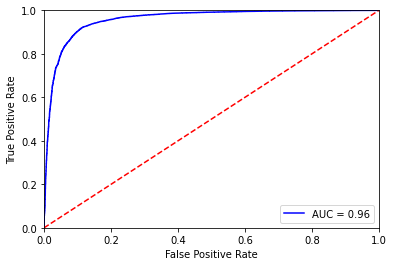

In [ ]:
#sentiment_model.evaluate(test_data, metric='roc_curve')
from sklearn.metrics import roc_curve, roc_auc_score, auc
test_predictions = sentiment_model.predict_proba(test_features)[:, 1]
fpr, tpr, threshold = roc_curve(test_labels, test_predictions)
roc_auc = auc(fpr, tpr)
print("Model score:", sentiment_model.score(test_features, test_labels))
print("FPR/TPR amount:", len(fpr), len(tpr))

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

In [ ]:
#sentiment_model.show(view='Evaluation')

#Applying the learned model to understand sentiment for Giraffe

In [ ]:
giraffe_reviews = giraffe_reviews.dropna(subset=['review'])
giraffe_reviews_features = vectorizer.transform(giraffe_reviews['review'].values)
giraffe_reviews['predicted_sentiment'] = sentiment_model.predict_proba(giraffe_reviews_features)[:, 1]

In [ ]:
giraffe_reviews.head()

,name,review,rating,word_count,predicted_sentiment
34313,Vulli Sophie the Giraffe Teether,He likes chewing on all the parts especially t...,5,"{'He': 1, 'likes': 1, 'chewing': 1, 'on': 1, '...",0.998948
34314,Vulli Sophie the Giraffe Teether,My son loves this toy and fits great in the di...,5,"{'My': 1, 'son': 1, 'loves': 1, 'this': 1, 'to...",0.999739
34315,Vulli Sophie the Giraffe Teether,There really should be a large warning on the ...,1,"{'There': 1, 'really': 1, 'should': 1, 'be': 1...",0.171440
34316,Vulli Sophie the Giraffe Teether,All the moms in my moms\' group got Sophie for...,5,"{'All': 1, 'the': 2, 'moms': 1, 'in': 1, 'my':...",0.977251
34317,Vulli Sophie the Giraffe Teether,I was a little skeptical on whether Sophie was...,5,"{'I': 4, 'was': 2, 'a': 1, 'little': 1, 'skept...",0.395488


##Sort the reviews based on the predicted sentiment and explore

In [ ]:
giraffe_reviews = giraffe_reviews.sort_values('predicted_sentiment', ascending=False)

In [ ]:
giraffe_reviews.head()

,name,review,rating,word_count,predicted_sentiment
34892,Vulli Sophie the Giraffe Teether,"Sophie, oh Sophie, your time has come. My gran...",5,"{'Sophie': 17, ',': 8, 'oh': 1, 'your': 1, 'ti...",1.0
34434,Vulli Sophie the Giraffe Teether,My Mom-in-Law bought Sophie for my son when he...,5,"{'My': 1, 'Mom-in-Law': 1, 'bought': 1, 'Sophi...",1.0
34515,Vulli Sophie the Giraffe Teether,"As every mom knows, you always want to give yo...",5,"{'As': 1, 'every': 1, 'mom': 1, 'knows': 1, ',...",1.0
34442,Vulli Sophie the Giraffe Teether,"Yes, it\'s imported. Yes, it\'s expensive. And...",5,"{'Yes': 2, ',': 14, 'it\': 4, ''s': 6, 'import...",1.0
34746,Vulli Sophie the Giraffe Teether,Sophie the Giraffe is the perfect teething toy...,5,"{'Sophie': 5, 'the': 6, 'Giraffe': 1, 'is': 7,...",1.0


##Most positive reviews for the giraffe

In [ ]:
giraffe_reviews['review'].values[0]

"Sophie, oh Sophie, your time has come. My granddaughter, Violet is 5 months old and starting to teeth. What joy little Sophie brings to Violet. Sophie is made of a very pliable rubber that is sturdy but not tough. It is quite easy for Violet to twist Sophie into unheard of positions to get Sophie into her mouth. The little nose and hooves fit perfectly into small mouths, and the drooling has purpose. The paint on Sophie is food quality.Sophie was born in 1961 in France. The maker had wondered why there was nothing available for babies and made Sophie from the finest rubber, phthalate-free on St Sophie\\'s Day, thus the name was born. Since that time millions of Sophie\\'s populate the world. She is soft and for babies little hands easy to grasp. Violet especially loves the bumpy head and horns of Sophie. Sophie has a long neck that easy to grasp and twist. She has lovely, sizable spots that attract Violet\\'s attention. Sophie has happy little squeaks that bring squeals of delight fro

In [ ]:
giraffe_reviews['review'].values[1]

'My Mom-in-Law bought Sophie for my son when he was just starting to really chew on things (and we were hearing some pretty scary things about toys not made in the USA). She did some research and came across Sophie and we are so glad that she did! While Sophie doesn\\\'t come from the USA, we love the fact that she is 100% safe and natural, and my son loves to play with her. I also love how soft Sophie is, my son tends to swing his toys around and when he\\\'s sitting on my lap I\\\'m usually in danger of being hit in the face with whatever he\\\'s holding, needless to say a soft toy is even better in my book! There\\\'s one last thing I want to comment on, I\\\'ve read reviews that said that Sophie was a "glorified dog toy" or something to that effect, and I don\\\'t want to seem rude, but I think they\\\'re crazy! Yes Sophie does squeak, (which my son didn\\\'t care about much at first but now he loves) but that\\\'s about as far as the comparison could go! If you want a quality teet

##Show most negative reviews for giraffe

In [ ]:
giraffe_reviews['review'].values[-1]

'I wanted to love this product and was excited to buy it when I became pregnant but am now hesitant to let my baby use it after reading about the recall in Europe. Apparently, as I understand it, their toxin standards of measurement are lower than ours so they have not been recalled here (apparently we are OK with low levels of nitrates in the toys our children put in their mouths, but Europeans are not...hmmm)...Be that as it may, toxins registering even CLOSE to a dangerous level made me nervous about using. After digging around online I did discover that the company claims to have changed the product after a certain date and lists manufacturing codes so you can check yours (those listed were made after a certain date and are said to be safer). Sadly mine was not made after the &#34;improved&#34; date but I could not return it because there was no formal recall in our country. I considered returning it and hunting for one with an approved manufacturing date but man that was just too 

In [ ]:
giraffe_reviews['review'].values[-2]

"I was so looking forward to getting this for my little girl, but from the second I opened the box I was disappointed.  It didn\\'t smell like vanilla rubber; it smelled like latex.  I don\\'t get HOW it can be called a teether.  It is a squeak toy.  Period.  It is completely hollow and has an obnoxious squeak when you barely even touch it.  It is so flexible that I don\\'t see how a- it can be safe (which reading some of the other negative reviews I now see that it probably isn\\'t safe) or b- can be effective.  This thing gives at the slightest touch, so how can it possibly aid in cutting teeth or massaging the gums?Additionally, you cannot sterilize this toy.  So... let\\'s see.  My baby got thrush when she was only 2 weeks old and I had to sterilize everything that came in contact with her mouth.  What would I have done with this then?  And she just got over her first cold, so again everything was sterilized.  You need to sterilize things with a baby- you just do.  How can this be 